In [1]:
from utils import *

%matplotlib inline

(512, 512)


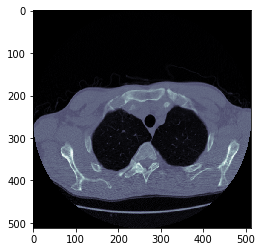

In [2]:
lung = dicom.read_file("/deep/group/shubhang/lcd_data/stage1/0015ceb851d7251b8f399e39779d1e7d/00ac2629fe659e68f4879da4812af659.dcm")

slice = lung.pixel_array
slice[slice == -2000] = 0
print(slice.shape)
plt.imshow(slice, cmap=plt.cm.bone)

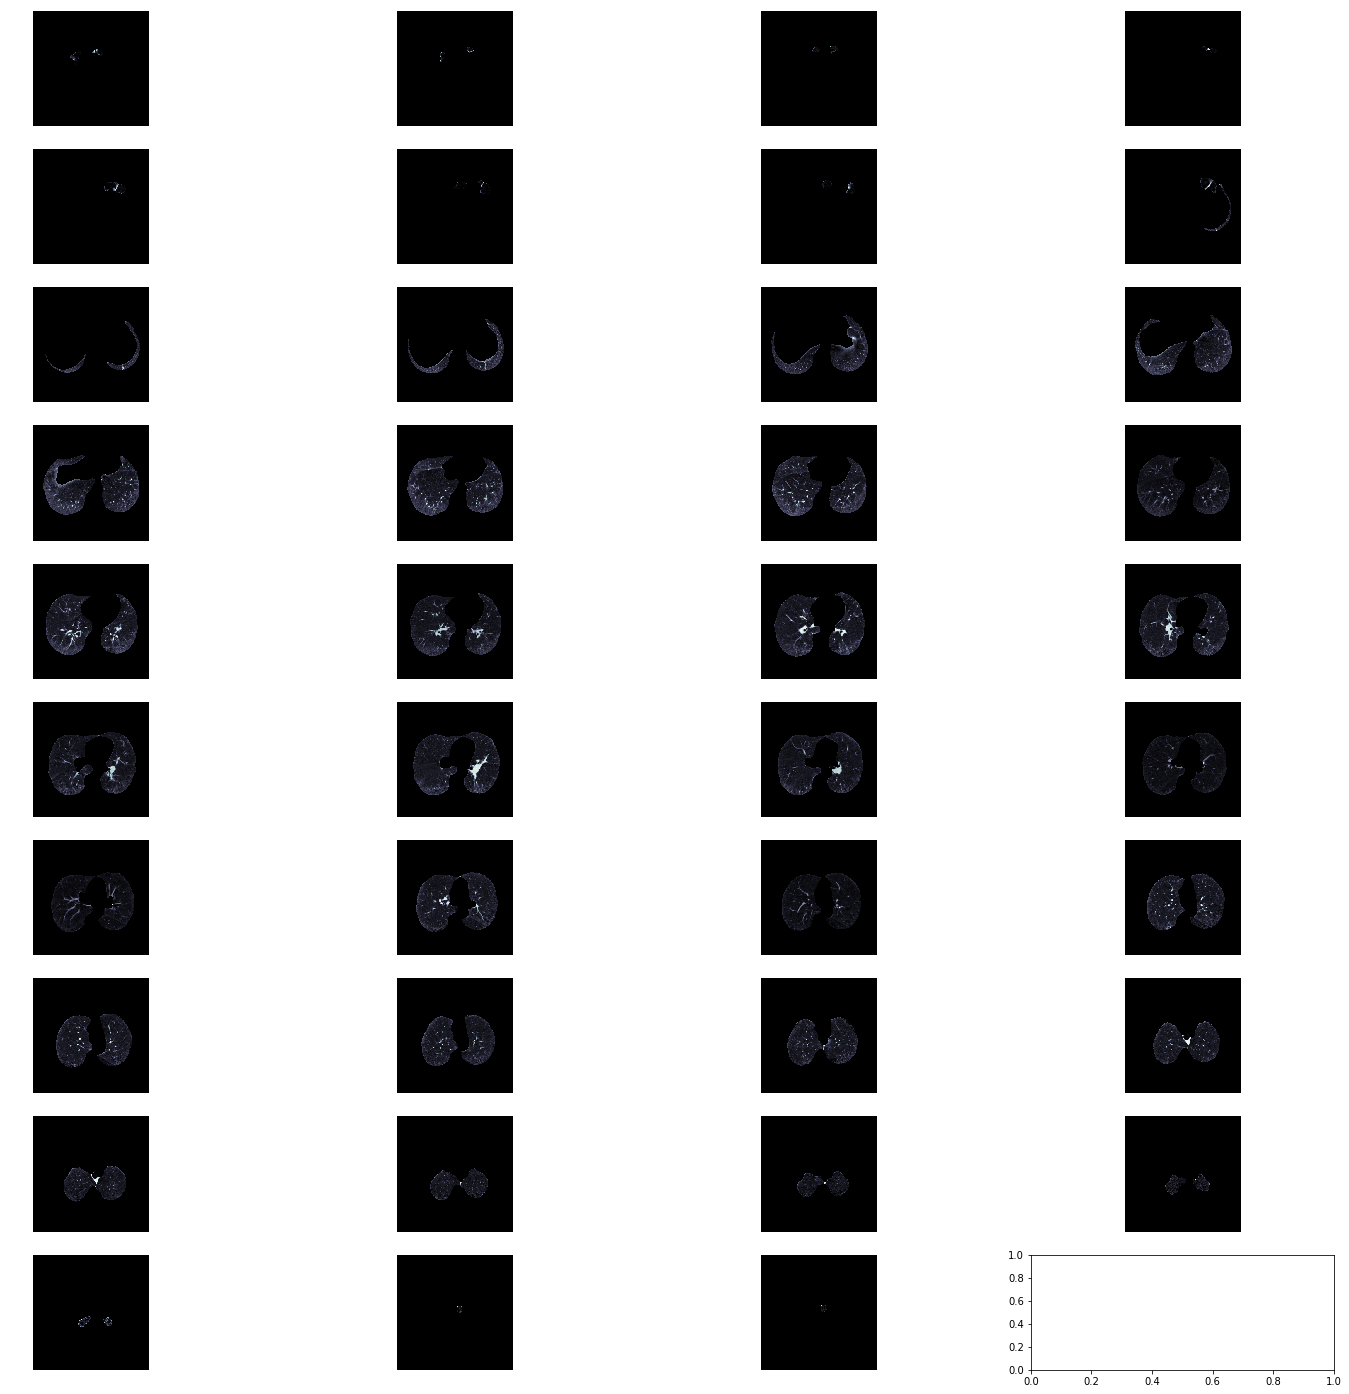

In [3]:
ct_scan = read_ct_scan("/deep/group/shubhang/lcd_data/stage1/0015ceb851d7251b8f399e39779d1e7d/")
plot_ct_scan(ct_scan)

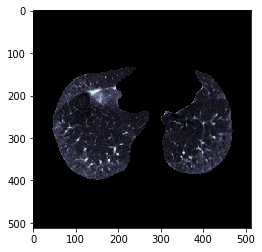

In [8]:
plt.imshow(ct_scan[63], cmap=plt.cm.bone)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

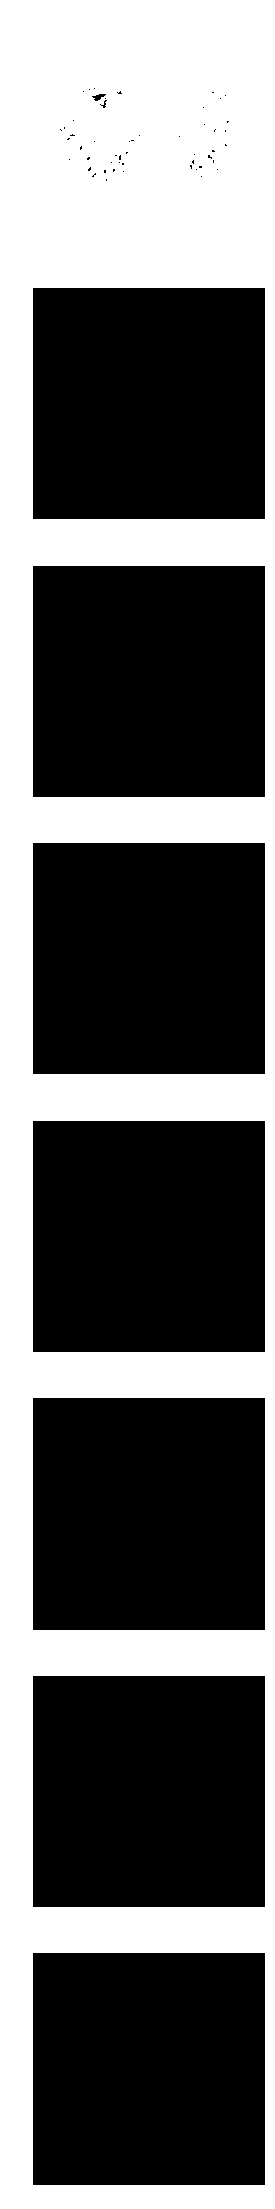

In [9]:
get_segmented_lungs(ct_scan[63], True)

In [ ]:
segmented_ct_scan = segment_lung_from_ct_scan(ct_scan)
plot_ct_scan(segmented_ct_scan)

In [1]:
import sys
from utils import *

scans = os.listdir('/deep/group/shubhang/lcd_data/stage1/')
tot = len(scans)

train_split, dev_split = int(0.75 * tot), int(0.2 * tot)
train_ids, dev_ids, test_ids = scans[:train_split], scans[train_split:train_split+dev_split], scans[train_split+dev_split:]
datasets = {'train': train_ids, 'dev': dev_ids, 'test': test_ids}

labels = pd.read_csv('/deep/group/shubhang/lcd_data/labels.csv')
base = '/deep/group/shubhang/classification_lungs/'

for dtype in ['train', 'dev', 'test']:
    dataset = datasets[dtype]
    amt = len(dataset)
    for i, scan in enumerate(dataset):
        sys.stdout.write('\r%d/%d' % (i+1, amt))
        
        if os.path.exists(base + dtype + '/0/' + scan + '.npy') or os.path.exists(base + dtype + '/1/' + scan + '.npy'):
            continue
        
        try:
            label = labels.loc[labels['id'] == scan]['cancer'].as_matrix()[0]
        except IndexError:
            continue
        
        final_path = base + dtype + '/' + str(label) + '/' + scan
        
        path = '/deep/group/shubhang/lcd_data/stage1/' + scan + '/'
        ct_scan = read_ct_scan(path)
        print(ct_scan.dtype)
        #seg_ct = segment_lung_from_ct_scan(ct_scan)
        
        #np.save(final_path, ct_scan)
    print()

1/1196[   9   23   24 ..., 1148 1154 1134]
[   5   10   29 ..., 1217 1223 1188]
[  27   23   25 ..., 1383 1364 1348]
[   8   15   24 ..., 1408 1411 1373]
[  23   13   18 ..., 1380 1366 1353]
[  21   24   36 ..., 1352 1371 1366]
[  26   16   20 ..., 1367 1364 1357]
[  18   17   20 ..., 1329 1350 1356]
[  32   22   17 ..., 1312 1288 1284]
[  12   23   45 ..., 1103 1083 1060]
[  17   20   12 ..., 1245 1247 1234]
[  19   25   26 ..., 1397 1392 1377]
[  19   35   33 ..., 1260 1260 1286]
[  10   28   19 ..., 1375 1364 1356]


KeyboardInterrupt: 

In [7]:
root = '/deep/group/shubhang/classification_lungs/'
ids = os.listdir(root + 'train/0')
test = np.load(root + 'train/0/' + ids[0]).astype(np.float16)
plot_ct_scan(test)

ValueError: Unsupported dtype

In [6]:
test.dtype

dtype('float64')